<a href="https://colab.research.google.com/github/WilliamHallPortfolio/01-Home_Price_Prediction/blob/main/Housing%20Price%20Prediction%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction

## Installing Packages

In [5]:
import pandas as pd # Data Processing
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations

import warnings
warnings.filterwarnings('ignore') # Ignore Warnings

###### Importing test and train sets locally

In [6]:
# df_train = pd.read_csv('train.csv') # Training
# df_test = pd.read_csv('test.csv') # Test

###### Importing through Github

In [7]:
!git clone https://github.com/WilliamHallPortfolio/01-Home_Price_Prediction.git

fatal: destination path '01-Home_Price_Prediction' already exists and is not an empty directory.


In [8]:
df_train = pd.read_csv("/content/01-Home_Price_Prediction/train.csv")
df_test = pd.read_csv("/content/01-Home_Price_Prediction/test.csv")

###### Inspecting Imported Data

In [9]:
# Checking head of train dataset
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
# Checking head of train dataset
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
# Checking summary statistics of train dataset
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
# Checking summary statistics of test dataset
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
# Checking datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Checking and Cleaning Null Values

In [14]:
# Searching columns with Null values (train)
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [15]:
# Searching columns with Null values (train)
df_test.columns[df_test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [16]:
# Count of Nans in train
train_null = df_train[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']]
train_null.isna().sum()

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [17]:
# Count of Nans in train
test_null = df_test[['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType']]
test_null.isna().sum()

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


### Cleaning Training Dataset

#### Numerical Columns

In [18]:
# Identifying which attributes with Nans that contain numerical values
train_null.select_dtypes(exclude='object').columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [19]:
# Imputing NaNs in the numerical columns of the original training set with the median
nan_val = df_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
for med in nan_val:
    median_val = df_train[med].median()
    df_train[med].fillna(median_val, inplace=True)

In [20]:
df_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

,0
LotFrontage,0
MasVnrArea,0
GarageYrBlt,0


#### Categorical Columns

In [21]:
# Identifying which attributes contain categorical values
train_null.select_dtypes(include='object').columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [22]:
# Dropping categorical attributes that contain over a third NaN values
df_train = df_train.drop(['MasVnrType', 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                            'Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond'],axis=1)

In [23]:
# Checking leftover Null columns
df_train.columns[df_train.isnull().any()]

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [24]:
# Imputing NaNs in categorical attributes with the Mode
cat_col = df_train[['Alley', 'PoolQC', 'Fence', 'MiscFeature']]
for mode in cat_col:
    mode_val = df_train[mode].mode()[0]
    df_train[mode].fillna(mode_val, inplace=True)


#### Cleaning Results:

In [25]:
clean_nans = df_train.isnull().sum().sum()
print(f'Total Null values in training dataset: {clean_nans}')

Total Null values in training dataset: 0


### Cleaning Test Dataset

#### Dropping Columns Not Present in Training Dataset

**NOTE:** Upon examination of both train and test datasets, I noticed that the test dataset <br>
was missing columns that are present in the test training set. <br>
I decided to remove them to preserve the consistency between the two datasets.

In [26]:
# Finding test dataset columns not present in training dataset
unique_test = set(df_test.columns).difference(set(df_train.columns))
unique_test

{'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'FireplaceQu',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'MasVnrType'}

In [27]:
# Dropping columns that are not in Training set
df_test = df_test.drop(['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
 'Electrical','FireplaceQu','GarageCond','GarageFinish','GarageQual','GarageType','MasVnrType'],axis=1)

#### Continue Cleaning Testing Dataset

In [28]:
# Cleaning testing dataset
df_test.columns[df_test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [29]:
# Checking How Many Nans in Each Column
test_null = df_test[['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType']]
test_null.isnull().sum()

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrArea,15
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1


#### Numerical Columns

In [30]:
# Identifying which attributes contain numerical values
test_null.select_dtypes(include='number').columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [31]:
# Imputing NaNs in the numerical columns of the original testing set with the median
nan_val = df_test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']]
for med in nan_val:
    median_val = df_test[med].median()
    df_test[med].fillna(median_val, inplace=True)

#### Categorical Columns

In [32]:
# Identifying columns with categorical Null values
df_test.columns[df_test.isnull().any()]

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'KitchenQual', 'Functional', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [33]:
# Imputing NaNs in categorical attributes with the Mode
cat_col = df_test[['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'KitchenQual', 'Functional', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType']]
for mode in cat_col:
    mode_val = df_test[mode].mode()[0]
    df_test[mode].fillna(mode_val, inplace=True)

In [34]:
clean_nans = df_test.isnull().sum().sum()
print(f'Total Null values in testing dataset: {clean_nans}')

Total Null values in testing dataset: 0


## Checking Distribution of Target Variable

<Axes: xlabel='SalePrice', ylabel='Density'>

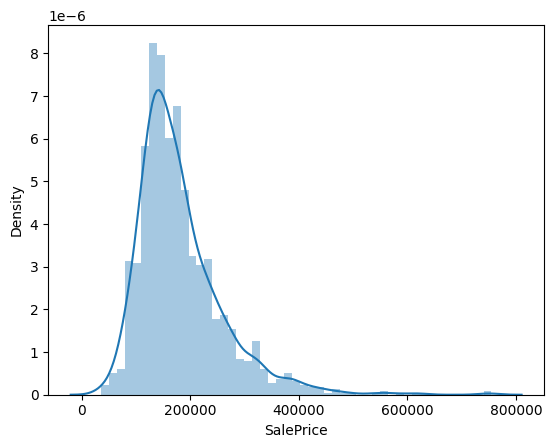

In [35]:
sns.distplot(df_train['SalePrice'])

**NOTE:**
It appears the distribution of the target variable is right skewed. <br>
This indicates the majority of data in the target is located under the mean. <br>

## Outlier Removal and Log Transformation of data

**NOTE:** For this linear regression model, I decided using log transformation to reduce the outliers in the target variable. This method tends to stabilize variance, make the data more normal distribution-like, and reduce the influence of outliers. It often leads to better model performance and more interpretable coefficients in the presence of skewed distributions.

#### Boxplot of Target Variable

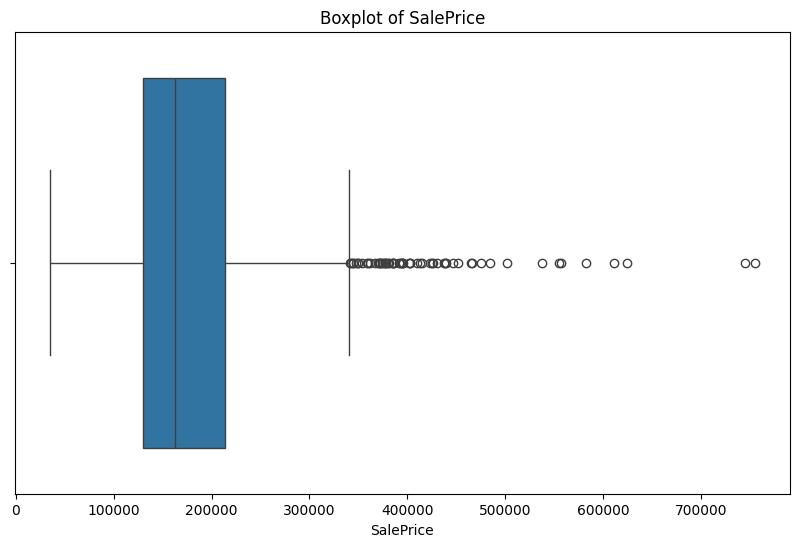

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.xlabel('SalePrice')
plt.show()

#### Log Transformation

In [37]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

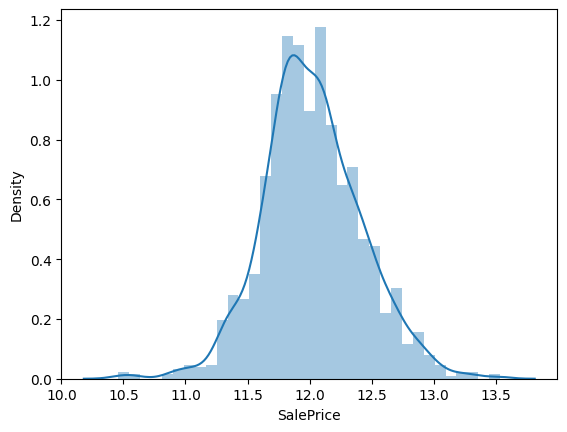

In [38]:
sns.distplot(df_train['SalePrice'])

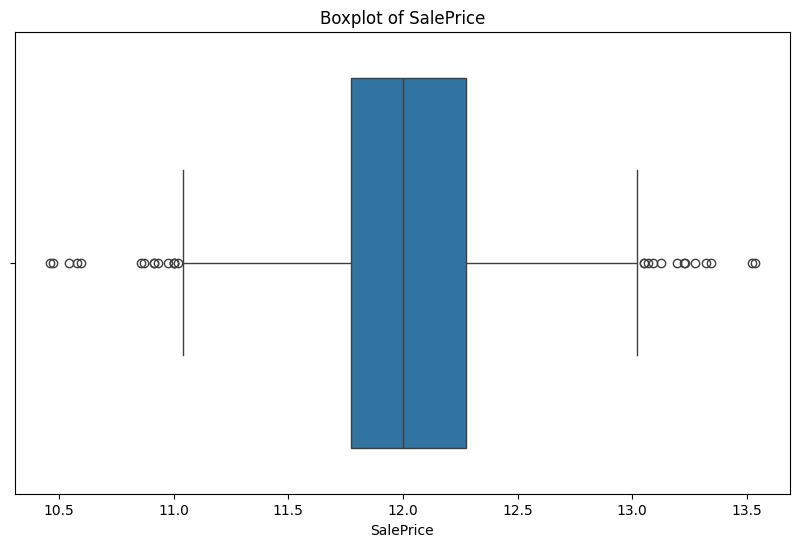

In [39]:
# Visualizing how log transformation impacted "SalePrice"
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.xlabel('SalePrice')
plt.show()

## Feature Selection

**NOTE** In this analysis, I am using SelectKBest to determine the most relevant features in the testing dataset

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression

In [41]:
# Seperating the numerical columns from the object columns in the independant variables
df_train_num = df_train.select_dtypes(exclude='object')

In [42]:
X = df_train_num.drop(['SalePrice'], axis = 1)
y = df_train['SalePrice']

In [43]:
# Feature Selector
feat_selector = SelectKBest(f_regression,k='all')
fit = feat_selector.fit(X,y)

In [44]:
# P values and Scoring

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]

**NOTE:** <br>
- **F-Score:** Higher values indicate better explanatory power <br>
- **P-Value:** Lower scores (p < 0.05) indicates statistical significance

In [45]:
summary_stats

,input_variable,p_value,f_score
4,OverallQual,0.000000e+00,2930.799393
16,GrLivArea,3.058151e-216,1408.121694
26,GarageCars,3.093382e-199,1258.349493
27,GarageArea,1.106027e-176,1071.733800
12,TotalBsmtSF,7.531828e-151,873.711794
13,1stFlrSF,1.074293e-141,807.335413
19,FullBath,2.118608e-140,798.100328
6,YearBuilt,1.103636e-135,764.779835
7,YearRemodAdd,3.211680e-124,685.840721
23,TotRmsAbvGrd,1.292526e-108,582.894320


**NOTE:** The F-score (along with the p-value) helps us identify which features are statistically significant.<br>
A higher F-score paired with a low p-value indicates there's a **strong** linear relationship with the target variable ("SalePrice")<br>
**ALSO NOTE:** that a score with a lower F-score paired a **very** low p-value could also be somewhat significant.

In [46]:
# SelectKBest features with highest scores
selected_variables

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 'OpenPorchSF',
 '2ndFlrSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'EnclosedPorch',
 'KitchenAbvGr',
 'ScreenPorch',
 'MSSubClass',
 'PoolArea']

In [47]:
# New X based on highest SelectKBest scores
X_new.head(3)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,...,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,EnclosedPorch,KitchenAbvGr,ScreenPorch,MSSubClass,PoolArea
0,7,1710,2,548,856,856,2,2003,2003,8,...,1,8450,1,150,3,0,1,0,60,0
1,6,1262,2,460,1262,1262,2,1976,1976,6,...,0,9600,0,284,3,0,1,0,20,0
2,7,1786,2,608,920,920,2,2001,2002,6,...,1,11250,1,434,3,0,1,0,60,0


In [48]:
len_of_X = len(X_new.columns)
print(f"Number of columns in new X: {len_of_X}")

Number of columns in new X: 28


### Replicating Preprocessing for Test Set

In [49]:
# Finding Test columns not present in X_new dataframe
unique_test = set(df_test.columns).difference(set(X_new.columns))

In [50]:
# Dropping columns that are not in Training set
X_new_test = df_test.drop(['3SsnPorch','Alley','BldgType','BsmtFinSF2','BsmtHalfBath','CentralAir',
                           'Condition1','Condition2','ExterCond','ExterQual','Exterior1st','Exterior2nd',
                           'Fence','Foundation','Functional','Heating','HeatingQC','HouseStyle','Id','KitchenQual',
                           'LandContour','LandSlope','LotConfig','LotShape','LowQualFinSF','MSZoning','MiscFeature',
                           'MiscVal','MoSold','Neighborhood','OverallCond','PavedDrive','PoolQC','RoofMatl',
                           'RoofStyle','SaleCondition','SaleType','Street','Utilities','YrSold'],axis=1)

In [51]:
# Examining order of features of both sets
print(X_new.columns)
print()
print(X_new_test.columns)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch',
       'KitchenAbvGr', 'ScreenPorch', 'MSSubClass', 'PoolArea'],
      dtype='object')

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea'],
      dtype='object')


In [52]:
# Ordering sets to match
X_new_test = X_new_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch',
       'KitchenAbvGr', 'ScreenPorch', 'MSSubClass', 'PoolArea']]

In [53]:
# Matching dtypes to both sets
for column in X_new.columns:
    if X_new[column].dtype != X_new_test[column].dtype:
        X_new_test[column] = X_new_test[column].astype(X_new[column].dtype)

## Exploritory Data Analysis (EDA)

##### 01 Heatmap

<Axes: >

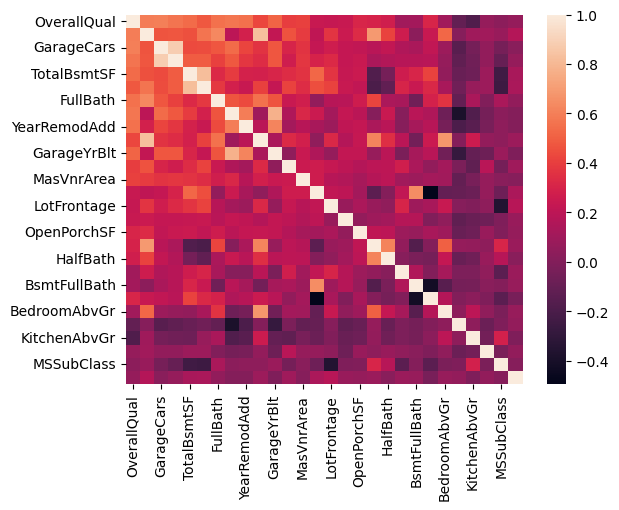

In [54]:
sns.heatmap(X_new.corr(numeric_only = True),annot=False)

##### 02 Scatterplots

**NOTE:** Since there are 28 features in this training set, a pairplot will run very slow. <br>
For this visualization I will create scatterplots on seperate rows.

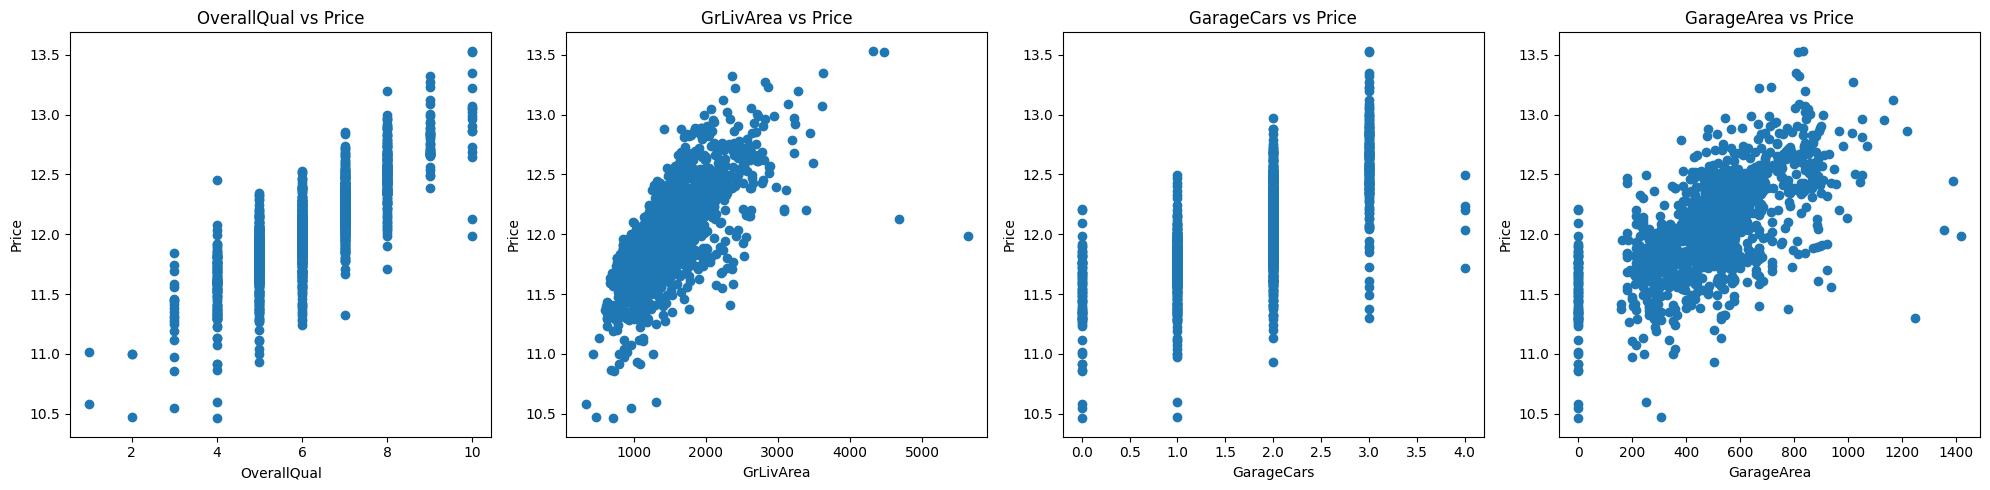

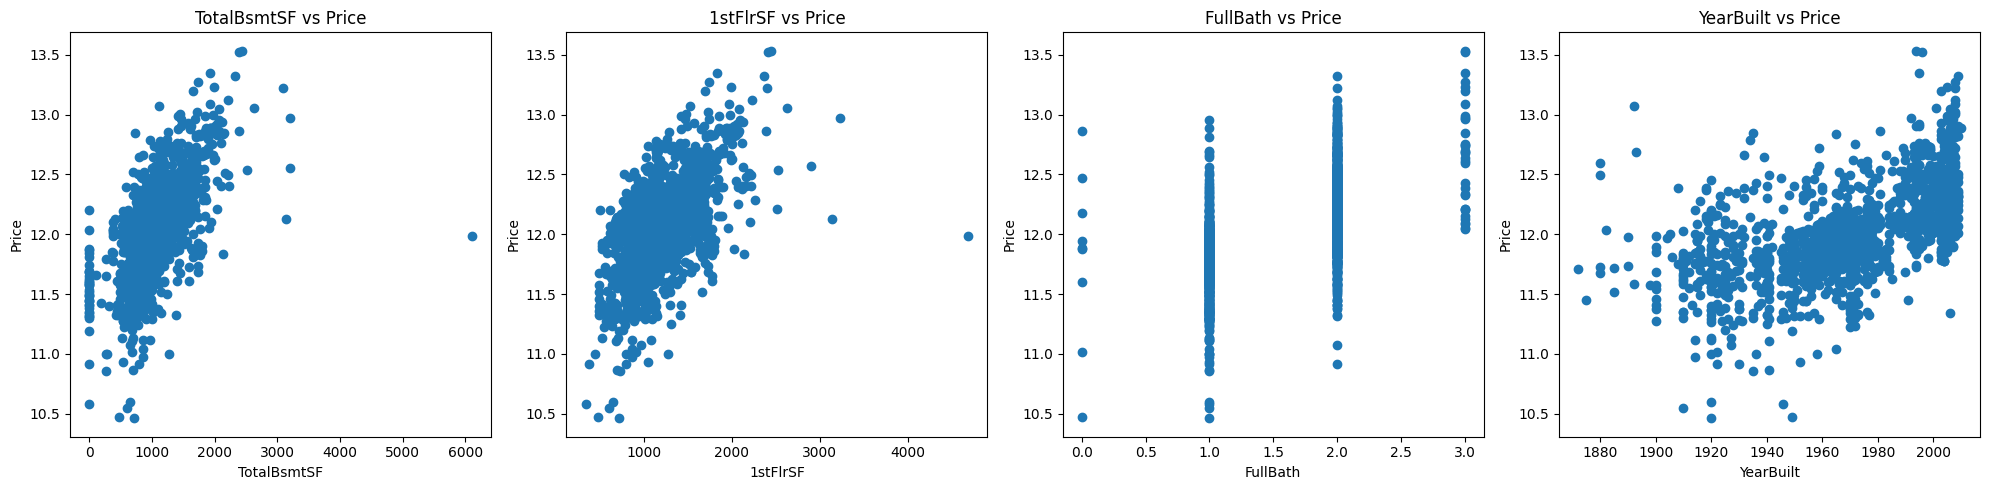

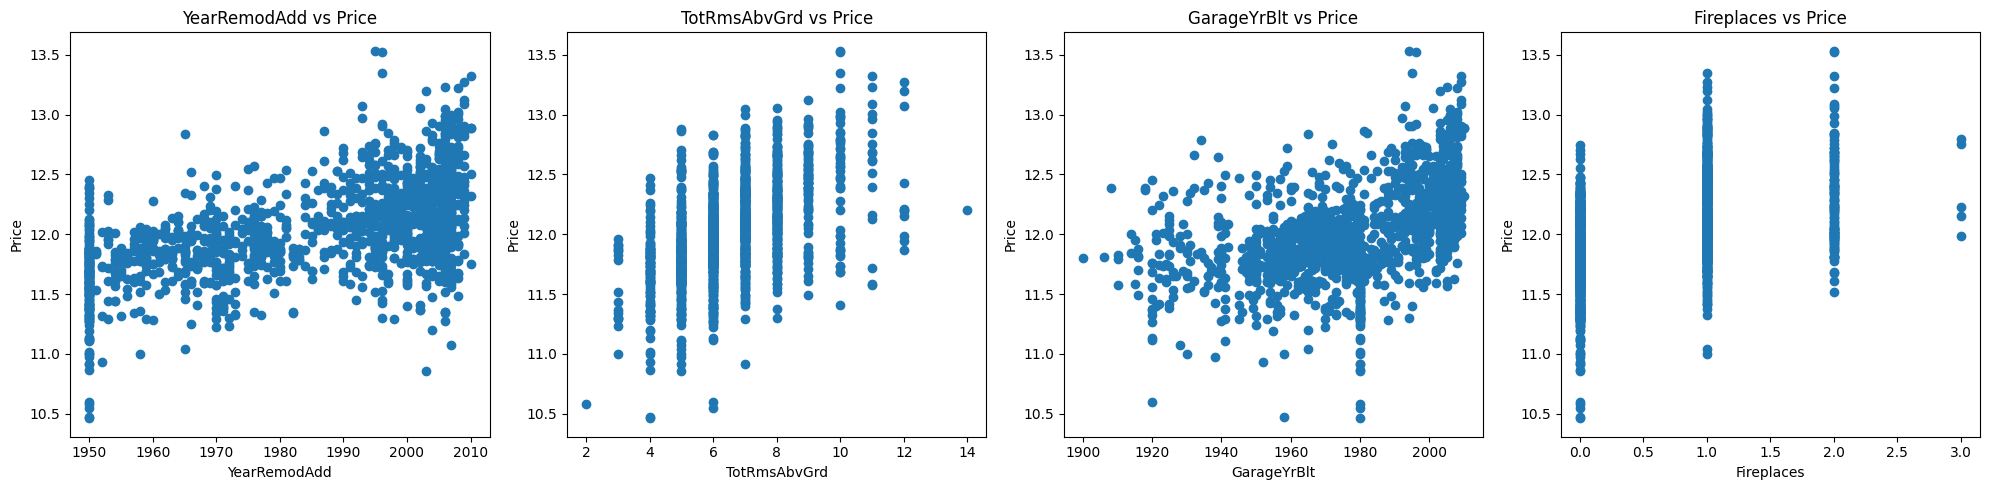

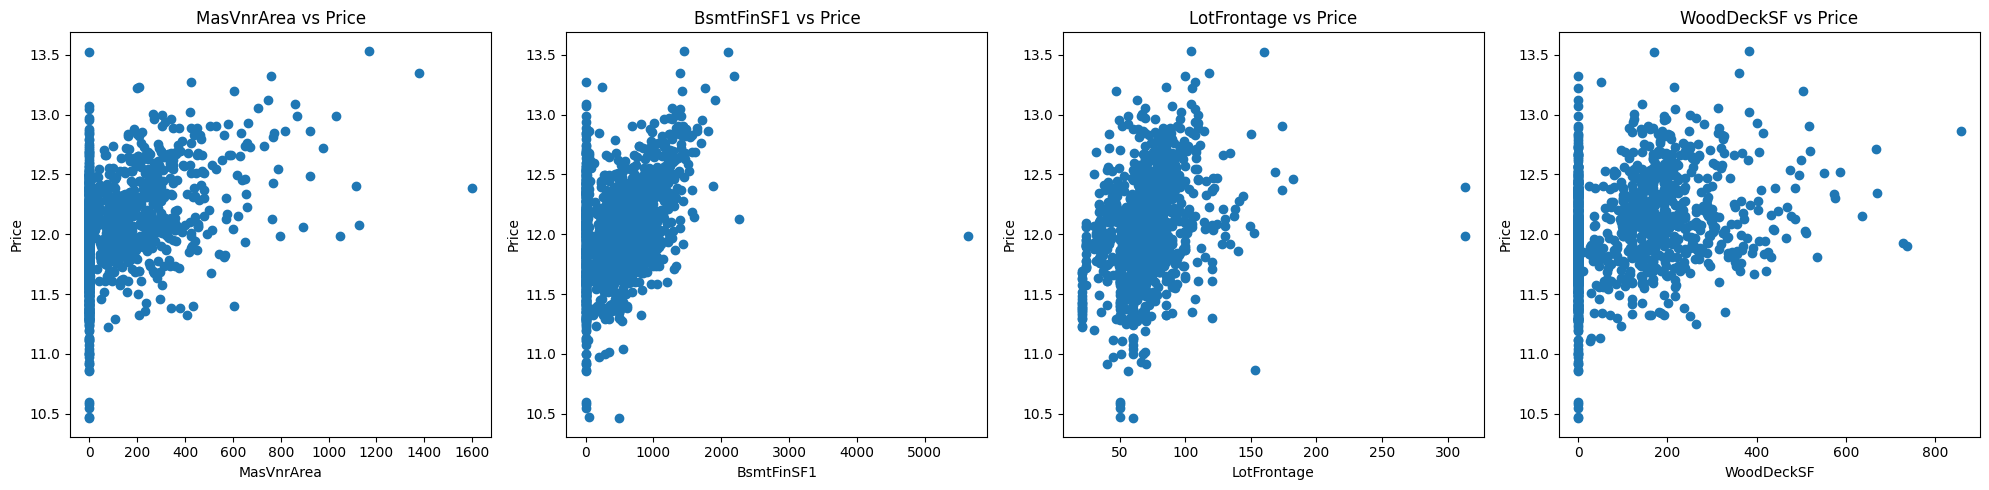

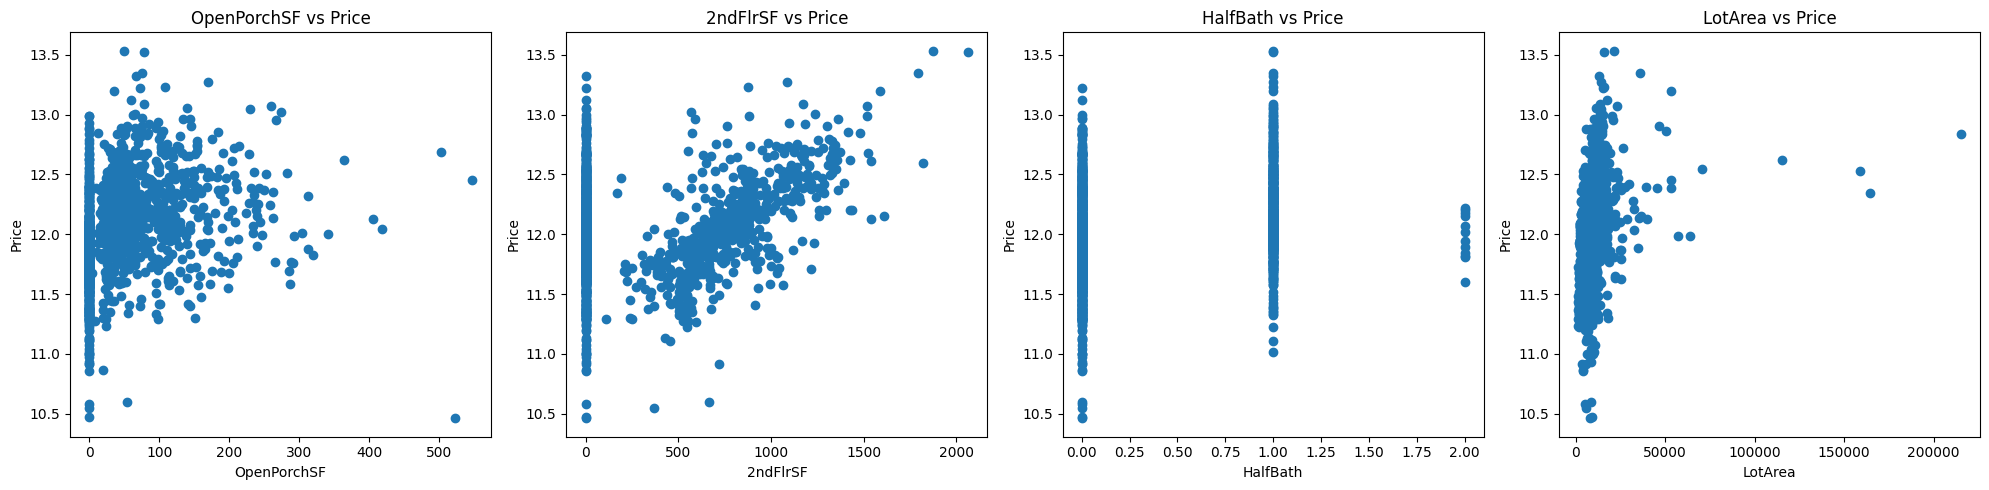

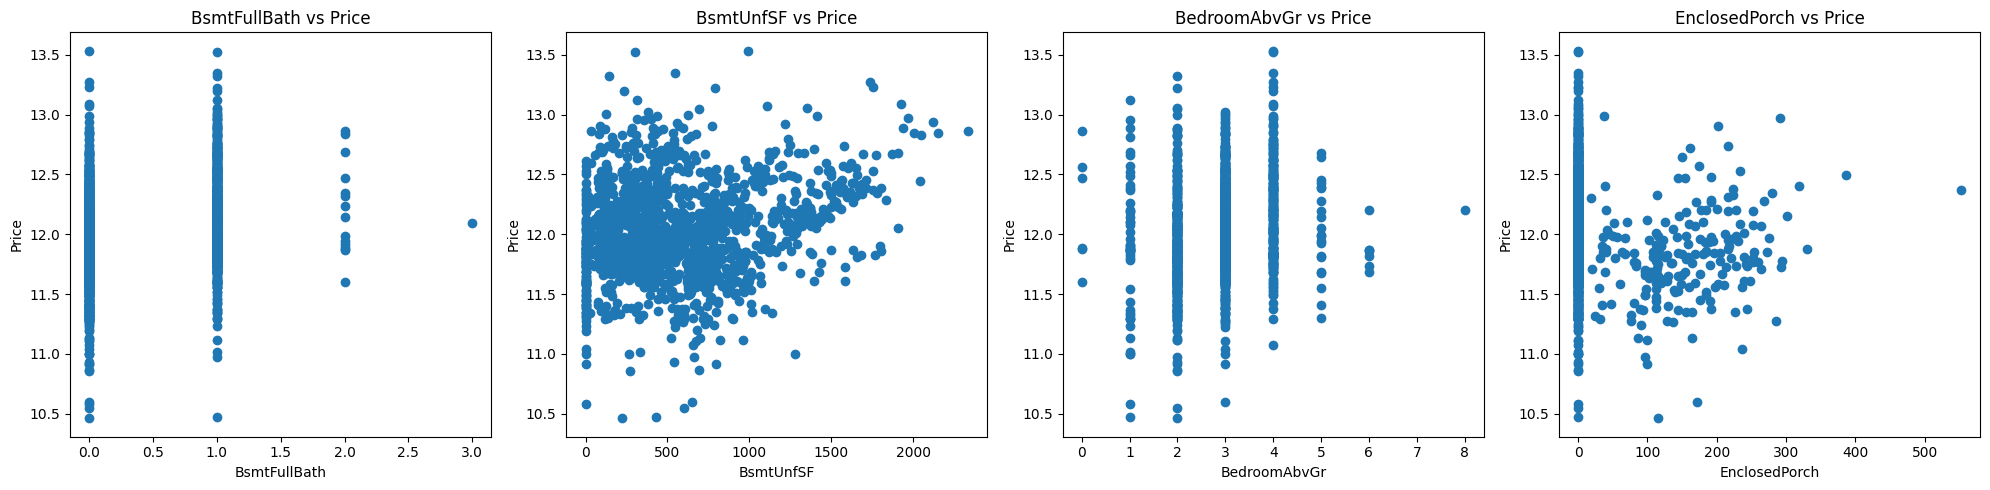

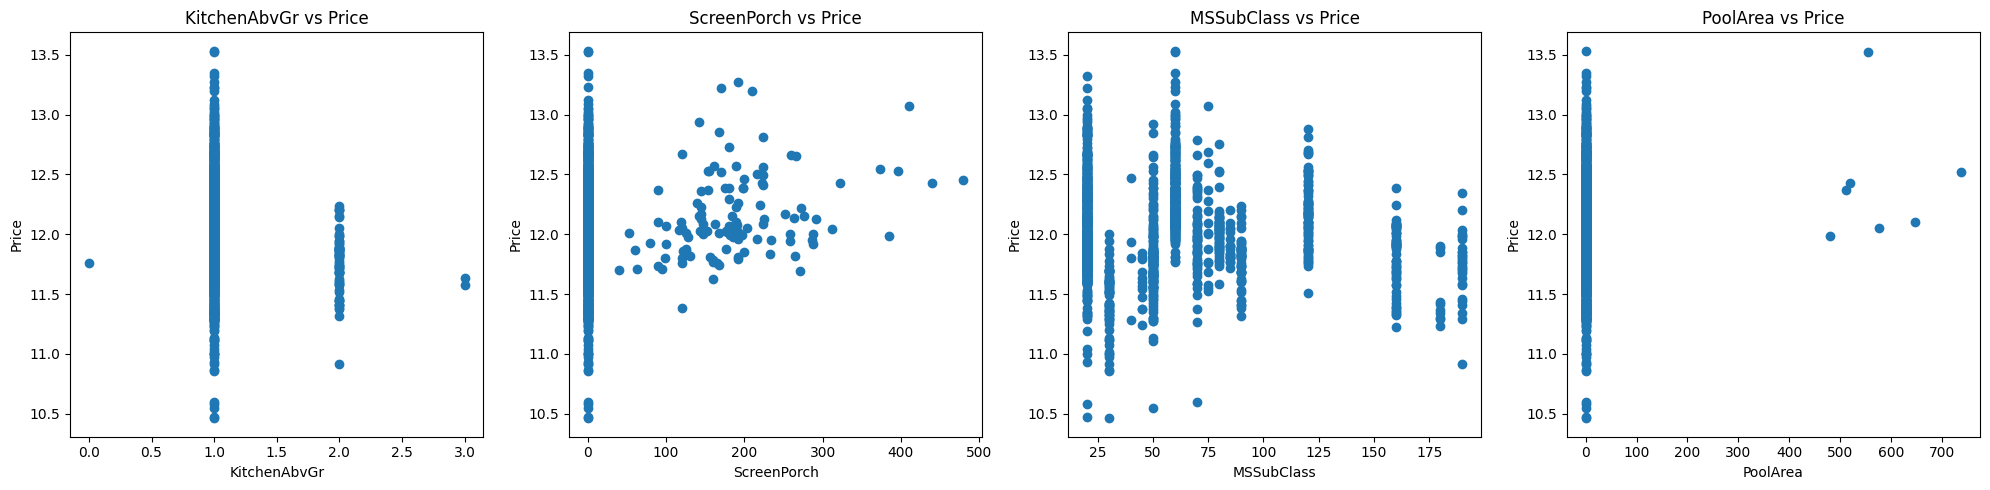

In [55]:
# Define the sets of selected variables
selected_sets = [selected_variables[i:i + 4] for i in range(0, 28, 4)]

# Iterate over each set of features and plot scatter plots
for features in selected_sets:
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

    # Plot scatter plots
    for ax, feature in zip(axes, features):
        ax.scatter(X[feature], y)
        ax.set_xlabel(feature)
        ax.set_ylabel('Price')
        ax.set_title(f'{feature} vs Price')

    plt.tight_layout()
    plt.show()

##### Inspecting amount of zeros

In [56]:
zeros = (X_new == 0).sum()

In [57]:
zeros

,0
OverallQual,0
GrLivArea,0
GarageCars,81
GarageArea,81
TotalBsmtSF,37
1stFlrSF,0
FullBath,9
YearBuilt,0
YearRemodAdd,0
TotRmsAbvGrd,0


## Algorithms used in this Model

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Seperating Numerical and Categorical Feature

**NOTE:RETURN TO THIS IF SCORES ARE OFF!**

In [59]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   GrLivArea      1460 non-null   int64  
 2   GarageCars     1460 non-null   int64  
 3   GarageArea     1460 non-null   int64  
 4   TotalBsmtSF    1460 non-null   int64  
 5   1stFlrSF       1460 non-null   int64  
 6   FullBath       1460 non-null   int64  
 7   YearBuilt      1460 non-null   int64  
 8   YearRemodAdd   1460 non-null   int64  
 9   TotRmsAbvGrd   1460 non-null   int64  
 10  GarageYrBlt    1460 non-null   float64
 11  Fireplaces     1460 non-null   int64  
 12  MasVnrArea     1460 non-null   float64
 13  BsmtFinSF1     1460 non-null   int64  
 14  LotFrontage    1460 non-null   float64
 15  WoodDeckSF     1460 non-null   int64  
 16  OpenPorchSF    1460 non-null   int64  
 17  2ndFlrSF       1460 non-null   int64  
 18  HalfBath

In [60]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [61]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [62]:
# Linear Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('regressor', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('regressor', Ridge())
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('regressor', Lasso())
])

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('regressor', RandomForestRegressor())
])

In [63]:
pipelines = {
    'Linear Regression': lr_pipeline,
    'Ridge Regression': ridge_pipeline,
    'Lasso Regression': lasso_pipeline,
    'Random Forest': rf_pipeline
}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f'{name} MAE: {mae}')
    print(f'{name} RMSE: {rmse}')
    print(f'{name} R^2: {r2}')
    print('-----------------------------------')

Linear Regression MAE: 0.11489622267412901
Linear Regression RMSE: 0.16175154189230917
Linear Regression R^2: 0.8597962451066651
-----------------------------------
Ridge Regression MAE: 0.11483127895304474
Ridge Regression RMSE: 0.16173121709286672
Ridge Regression R^2: 0.8598314773416431
-----------------------------------
Lasso Regression MAE: 0.1274148506822836
Lasso Regression RMSE: 0.19232139603998702
Lasso Regression R^2: 0.8017934546382677
-----------------------------------
Random Forest MAE: 0.10419661408166535
Random Forest RMSE: 0.15741960464943736
Random Forest R^2: 0.8672053981635583
-----------------------------------


## Evaluation of Train Split

In [64]:
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.02478093192798516


## Evaluation of Test Dataset

In [65]:
print(len(X_test))
print()
print(len(X_new_test))

292

1459


In [66]:
y_test_pred = pipeline.predict(X_new_test)

In [67]:
# Creating dataframe with predictions in log prices
df_test_predictions = pd.DataFrame(y_test_pred, columns=['SalePrice_log'])

# concatenating test set with log predictions
final_predictions = pd.concat([X_new_test,df_test_predictions],axis=1)

# Converting log prices to original prices and adding to final dataset
final_predictions['Original_SalePrice'] = round(np.exp(df_test_predictions),2)
final_predictions

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,...,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,EnclosedPorch,KitchenAbvGr,ScreenPorch,MSSubClass,PoolArea,SalePrice_log,Original_SalePrice
0,5,896,1,730,882,896,1,1961,1961,5,...,0,270,2,0,1,120,20,0,11.723668,123459.48
1,6,1329,1,312,1329,1329,1,1958,1958,6,...,0,406,3,0,1,0,20,0,11.966101,157330.02
2,5,1629,2,482,928,928,2,1997,1998,6,...,0,137,3,0,1,0,60,0,12.077195,175816.23
3,6,1604,2,470,926,926,2,1998,1998,7,...,0,324,3,0,1,0,60,0,12.128882,185142.59
4,8,1280,2,506,1280,1280,2,1992,1992,5,...,0,1017,2,0,1,144,120,0,12.219267,202656.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0,0,546,546,1,1970,1970,5,...,0,546,3,0,1,0,160,0,11.308174,81484.98
1455,4,1092,1,286,546,546,1,1970,1970,6,...,0,294,3,0,1,0,160,0,11.380851,87627.56
1456,5,1224,2,576,1224,1224,1,1960,1996,7,...,1,0,4,0,1,0,20,0,11.965205,157189.07
1457,5,970,0,0,912,970,1,1992,1992,6,...,0,575,3,0,1,0,85,0,11.630302,112454.31


## Tuning Hyper-Parameters